# Week 10: Neural networks II -- Convolutions

### Aims

By the end of this notebook you will be able to understand 

>* The Basics of CNNs
>* Low dimensional image representation
>* Classification runs with neural networks


1. [**Setup**]

2. [**The Basics of CNNs**]

3. [**Low dimensional image representation**]

4. [**MNIST data set example**]


In this workshop we will implement some simple convolutional neural networks in keras. We will return to the dataset we saw originally in week 3 -- the MNIST set of handwritten digits. Our goal is to use CNNs to construct low dimensional representations of these images, and to try and understand what the CNNs have "learnt" to do in training. 

Exercises mainly created by Dr. Jacob Page in last year and modified slightly. 

---


As you work through the problems it will help to refer to your lecture notes. The exercises here are designed to reinforce the topics covered this week. The lecture notes include a small amount of documentation on the keras library, but please ask/discuss with the tutors if you get stuck, even early on! This may the first time many of you have seen keras, and things may be a little counter intuitive initially. 

---

**NOTE**: On noteable you will need to select the kernel **Language and Machine Learning** rather than the **standard python 3**, because we will be working with the TensorFlow library. Please be careful about your kernel selection at the beginning!



## CIFAR10 Data Set Demonstration (Source: tensorflow tutorial page)

Simple Demonstration from the Tensorflow library can be found from here:

[Convolutional Neural Network (CNN) to classify CIFAR images](https://www.tensorflow.org/tutorials/images/cnn?_gl=1*18rk8tj*_up*MQ..*_ga*MTM0MDU3MDA1MC4xNzExMzc3MjQ0*_ga_W0YLR4190T*MTcxMTM3NzI0NC4xLjAuMTcxMTM3NzI0NC4wLjAuMA..)

using the Keras Sequential API to create the model with lines of codes. 

- The example relies on the **CIFAR10** dataset contains **60,000 color images** in **10 classes**, with 6,000 images in each class. 

- The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.



In [ ]:
# Import TensorFlow
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Just for the computational purposes, let us look at random subset of these images rather than the whole data size
# You will be looking at different subsets so be aware that the results are varying!

# Define subset size
train_subset_size = 1000 
test_subset_size = 200

# Generate random indices for the training subset
train_indices = np.random.choice(train_images.shape[0], train_subset_size, replace=False)

# Generate random indices for the testing subset
test_indices = np.random.choice(test_images.shape[0], test_subset_size, replace=False)

# Select the subsets based on the random indices
train_images = train_images[train_indices]
train_labels = train_labels[train_indices]

test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

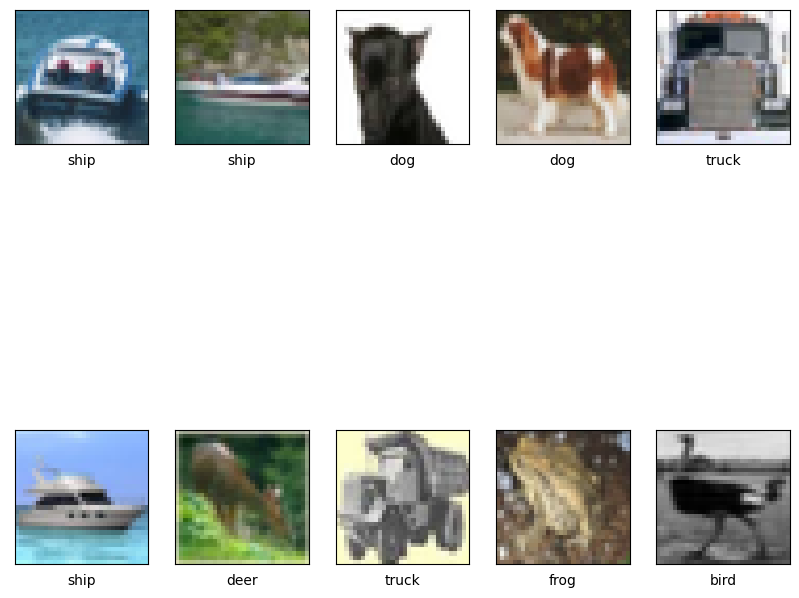

In [ ]:
# let's plot the first 10 images from the training set and display the class name below each image
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
 # Create the convolutional base
 # The 6 lines of code below define the convolutional base using a common pattern: 
 # a stack of Conv2D and MaxPooling2D layers.

 model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. 

- In this example, you will configure **your CNN** to process **inputs of shape (32, 32, 3)**, which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

- The output of every **Conv2D** and **MaxPooling2D** layer is a **3D tensor** of shape (height, width, channels). 

- **The width and height dimensions tend to shrink as you go deeper in the network.**

- The number of output channels for **each Conv2D layer** is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

In [ ]:
 # Add Dense layers on top
 model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

To complete the model, 

- you will feed the last output tensor from the convolutional base (of **shape (4, 4, 64)**) into one or more Dense layers to perform classification. 

- **Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.** 

- First, you will **flatten (or unroll) the 3D output to 1D**, then add one or more Dense layers on top. 

- **CIFAR has 10 output classes**, so you use a final Dense layer with 10 outputs.

- The network summary shows that **(4, 4, 64) outputs** were flattened into **vectors of shape (1024)** before going through two Dense layers.

In [ ]:
# Compile and train the model
# Just for the illustration, small epoch size is considered here, taking too much time otherwise
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
32/32 [==============================] - 2s 37ms/step - loss: 2.3020 - accuracy: 0.1010 - val_loss: 2.2864 - val_accuracy: 0.1300
Epoch 2/10
32/32 [==============================] - 1s 32ms/step - loss: 2.2022 - accuracy: 0.1690 - val_loss: 2.1181 - val_accuracy: 0.2350
Epoch 3/10
32/32 [==============================] - 1s 32ms/step - loss: 2.0430 - accuracy: 0.2450 - val_loss: 2.0016 - val_accuracy: 0.2950
Epoch 4/10
32/32 [==============================] - 1s 32ms/step - loss: 1.9310 - accuracy: 0.2800 - val_loss: 1.9814 - val_accuracy: 0.2700
Epoch 5/10
32/32 [==============================] - 1s 30ms/step - loss: 1.9265 - accuracy: 0.2650 - val_loss: 1.8757 - val_accuracy: 0.2950
Epoch 6/10
32/32 [==============================] - 1s 30ms/step - loss: 1.8135 - accuracy: 0.3270 - val_loss: 1.8626 - val_accuracy: 0.3250
Epoch 7/10
32/32 [==============================] - 1s 30ms/step - loss: 1.7845 - accuracy: 0.3490 - val_loss: 1.8741 - val_accuracy: 0.3450
Epoch 8/10
32

In [ ]:
# Evaluate the model on the hisrory
print(history.history['accuracy'])
print(history.history['val_accuracy'])

# loss and accuracy for the test data set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

[0.10100000351667404, 0.16899999976158142, 0.24500000476837158, 0.2800000011920929, 0.26499998569488525, 0.3269999921321869, 0.3490000069141388, 0.40700000524520874, 0.414000004529953, 0.43299999833106995]
[0.12999999523162842, 0.23499999940395355, 0.29499998688697815, 0.27000001072883606, 0.29499998688697815, 0.32499998807907104, 0.3449999988079071, 0.375, 0.3400000035762787, 0.36500000953674316]
7/7 - 0s - loss: 1.6658 - accuracy: 0.3650 - 34ms/epoch - 5ms/step


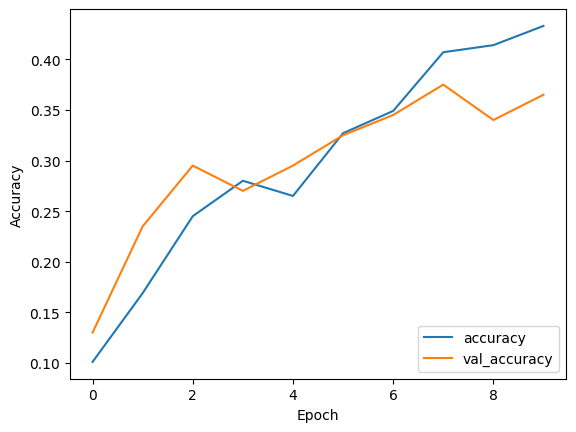

In [ ]:
# Plotting the behavior of accuracy or validation accuracy across epohcs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# MNIST Data Set again

In this workshop we will return to the famous "MNIST" dataset of handwritten digits. 

You might find it helpful to look back at your workshop from week 3, or the model solutions, when getting started here. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [ ]:
from tensorflow.keras.datasets import mnist
(images_all_raw_train, y_all_train), (images_all_raw_test, y_all_test) = mnist.load_data() # note we now also load the test set (compare to week 3)

Check the shapes of the arrays etc.

In [ ]:
print(images_all_raw_train.shape, y_all_train.shape)

(60000, 28, 28) (60000,)


We are also going to normalise to have outputs between 0 and 1 (we will use sigmoids at the output layer)

In [ ]:
images_all_train = images_all_raw_train / 255. 
images_all_test = images_all_raw_test / 255.

Just like in workshop 3, it will help to store the individual digits separately. To start with we'll just be training neural nets on some of the data (the 3s). 

Look back at workshop 3 for code on creating a dictionary of digits, or alternatively create your own data structure that lets you access all digits of a particular class. Visualise some digits when you are done to verify you have done this correctly. 

Please note you should do this for both the training and test sets -- it will be useful later!

In [ ]:
digits_dict_train = {}
count = 0

for label in y_all_train:
  if label in digits_dict_train:
    digits_dict_train[label] += [images_all_train[count]]
  else:
    digits_dict_train[label] = [images_all_train[count]]
  count += 1

digits_dict_test = {}
count = 0 

for label in y_all_test:
  if label in digits_dict_test:
    digits_dict_test[label] += [images_all_test[count]]
  else:
    digits_dict_test[label] = [images_all_test[count]]
  count += 1

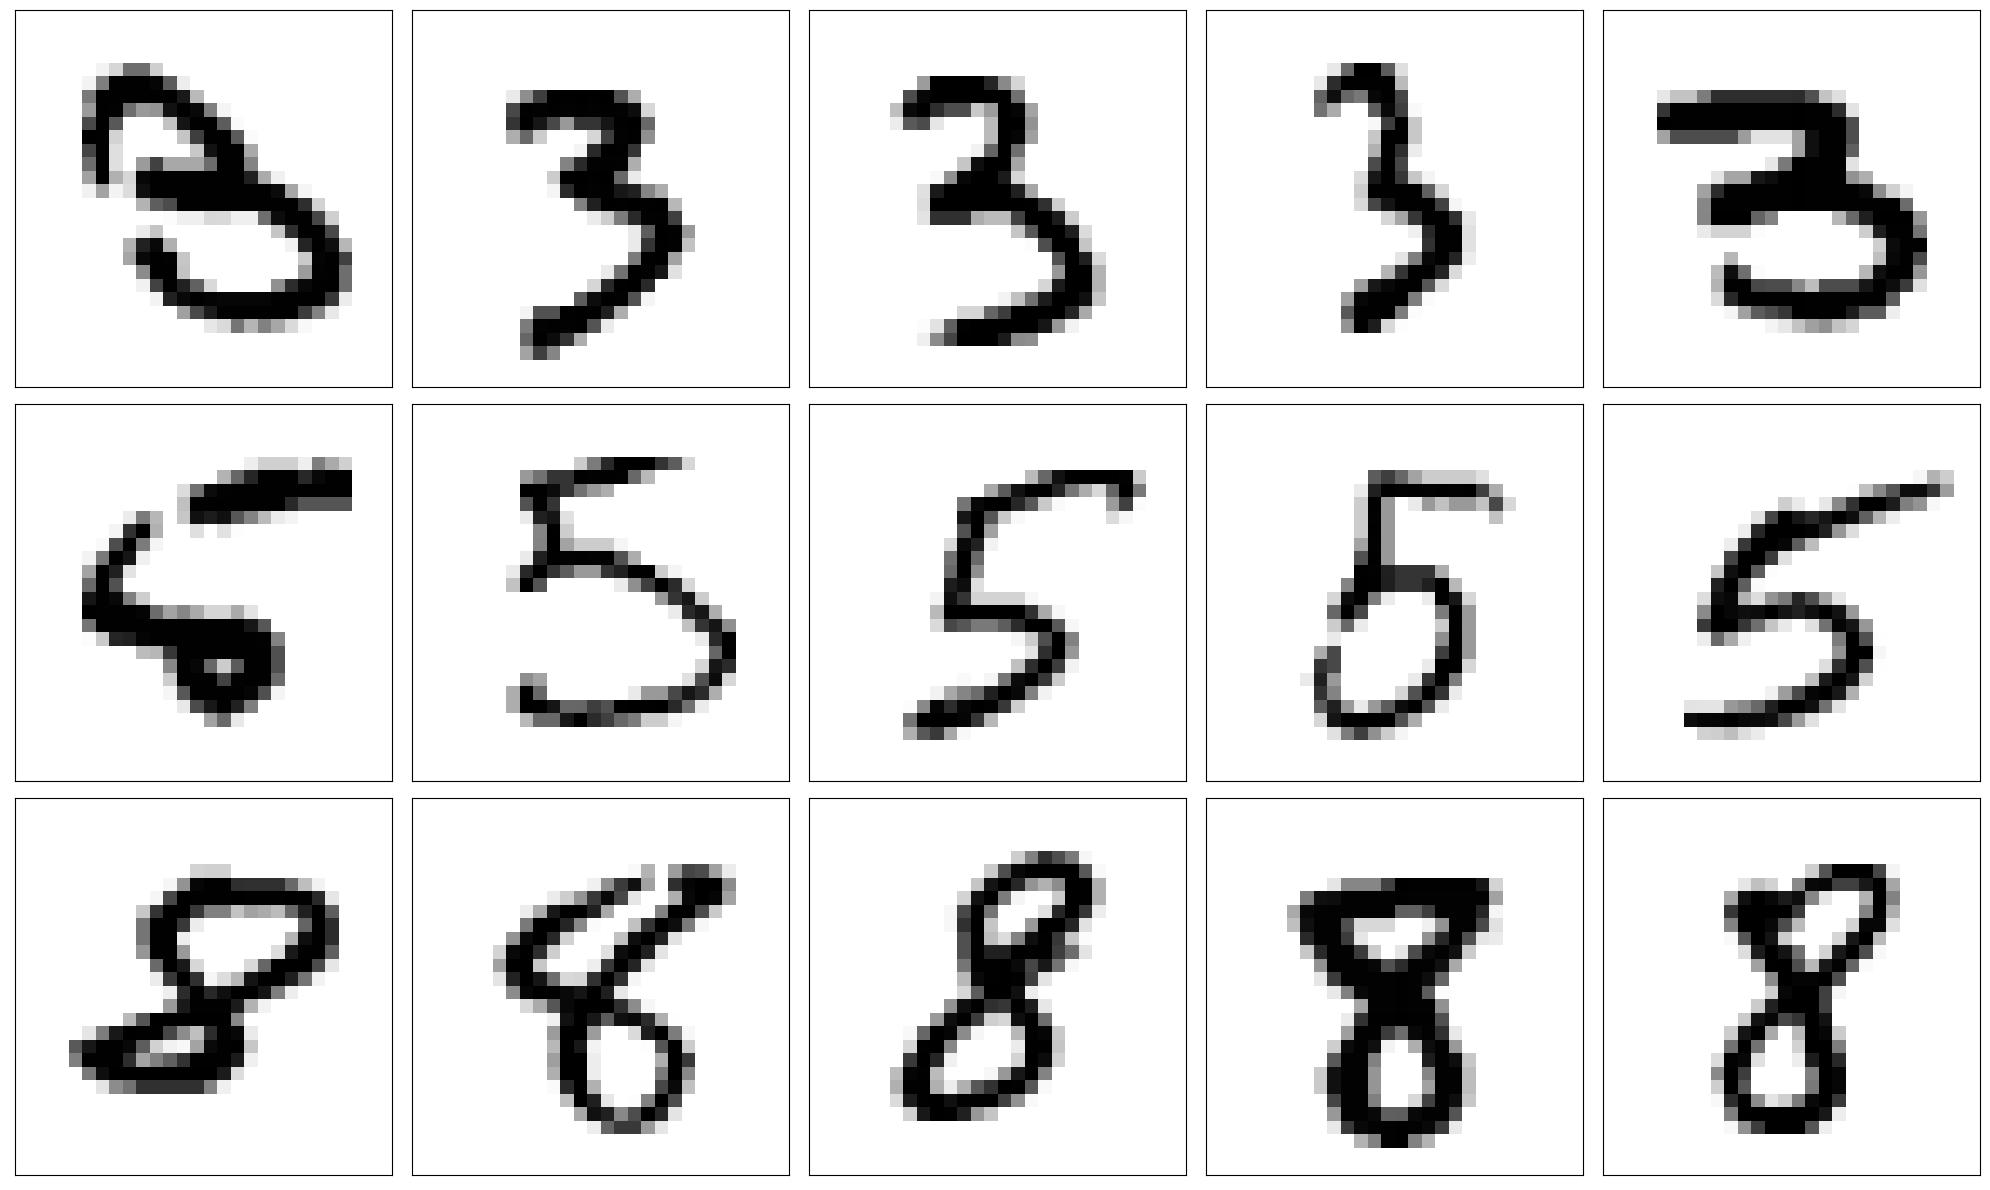

In [ ]:
test_labels = [3, 5, 8]
n_images_per_label = 5

fig = plt.figure(figsize=(4*n_images_per_label, 4*len(test_labels)))
for i in range(len(test_labels)):
  for j in range(n_images_per_label):
    ax_number = i * n_images_per_label + 1 + j
    ax = fig.add_subplot(len(test_labels), n_images_per_label, ax_number)
    ax.imshow(digits_dict_test[test_labels[i]][j], cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

# Exercise 1 (CORE)

The first thing we're going to do is to build an "autoencoder" with a fairly shallow CNN. Please take a look at the lecture notes for details on what the goal is with this architecture and also some example code in keras for the layer creation. 

We'll start by doing dimensionality reduction on the 3s, just like we did in week 3.

For exercise 1 our first task is to build an input layer. Recall that convolutions are designed to look at images with multiple channels. With that in mind, modify the input data accordingly and then create an input layer in keras. 

In [ ]:
array_3 = np.asarray(digits_dict_train[3])
images_3 = array_3.reshape(array_3.shape + (1,))

In [ ]:
input_layer = keras.layers.Input(shape=images_3.shape[1:])
print(input_layer)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_11'), name='input_11', description="created by layer 'input_11'")


In [ ]:
Nx, Ny = images_3.shape[1:-1] # useful later
Nx, Ny

(28, 28)

# Exercise 2 (CORE)

Create two convolutional + max pooling layers to shrink the dimension of the image. You are free to specify the filter size, padding strategy and number of filters. To avoid very long training times, I would recommend keeping the number of filters low, however. (For example, in the model solution I used 16 in the first layer, 8 in the second.)

- This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. Please check the function details of the [`Conv2D layer`](https://keras.io/api/layers/convolution_layers/convolution2d/)

- Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension. Please check the function details of the [`MaxPooling2D layer`](https://keras.io/api/layers/pooling_layers/max_pooling2d/)

In [ ]:
from tensorflow.keras import Model
# For the encoding part 
N_filters = 16

x = keras.layers.Conv2D(N_filters, kernel_size=(3,3), padding='same', activation='relu')(input_layer)
x = keras.layers.MaxPool2D(pool_size=(2,2), padding='same')(x)
x = keras.layers.Conv2D(N_filters // 2, kernel_size=(3,3), padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2), padding='same')(x)
x = keras.layers.Conv2D(N_filters // 4, kernel_size=(3,3), padding='same', activation='relu')(x)
# Consider adding more layers as needed!

encoded = keras.layers.MaxPool2D(pool_size=(2,2), padding='same')(x)

# Wrap the encoding part in a Keras Model
encoder_model = Model(inputs=input_layer, outputs=encoded)
encoder_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 4)           292

# Exercise 3 (CORE)
Now let's create a decoder as convolution -> upsampling -> convolution -> upsampling, followed by a final convolution to return an image of the same shape as the input. This can be harder than it looks! Remember you can visualise the properties of a model with model.summary(). 

Consider the use the function of [UpSampling2D layer](https://keras.io/api/layers/reshaping_layers/up_sampling2d/) after the `Conv2D` layer: 

- `Upsampling` layer for 2D inputs implementation uses interpolative resizing, given the resize method (specified by the interpolation argument).



In [ ]:
# For the decoding part 
x = keras.layers.Conv2D(N_filters // 4, kernel_size=(3,3), padding='same', activation='relu')(encoded)
x = keras.layers.UpSampling2D(size=(2,2))(x)
x = keras.layers.Conv2D(N_filters // 2, kernel_size=(3,3), padding='same', activation='relu')(x)
x = keras.layers.UpSampling2D(size=(2,2))(x)
x = keras.layers.Conv2D(N_filters, kernel_size=(3,3), activation='relu')(x)
x = keras.layers.UpSampling2D(size=(2,2))(x)
decoded = keras.layers.Conv2D(1, kernel_size=(3,3), padding='same', activation='sigmoid')(x)
# Consider adding more layers as needed!

# Wrap the decoding part in a Keras Model
decoder_model = Model(inputs=encoded, outputs=decoded)
decoder_model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 4, 4, 4)]         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 4)           148       
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 8, 8, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 8)           296       
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 16)        116

# Exercise 4 (CORE)

Now compile the model for the whole CNN (like autoencoder = encoder + decoder) ready for training. 

- What is the appropriate loss here? 

- How many parameters you have based on your model architecture ? 

In [ ]:
autoencoder = keras.models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 4)           292

Train the model. You might have to wait a minute or two for this. If you're training on full resolution data then I would recommend only running a few epochs. (You may want to enable GPU support in the runtime to speed things up).

In [ ]:
history_3 = autoencoder.fit(x=images_3, y=images_3, epochs=10, shuffle=True, validation_split=0.1)

Epoch 1/10
173/173 [==============================] - 5s 27ms/step - loss: 0.0999 - val_loss: 0.0499
Epoch 2/10
173/173 [==============================] - 4s 26ms/step - loss: 0.0442 - val_loss: 0.0386
Epoch 3/10
173/173 [==============================] - 4s 25ms/step - loss: 0.0378 - val_loss: 0.0343
Epoch 4/10
173/173 [==============================] - 4s 25ms/step - loss: 0.0341 - val_loss: 0.0313
Epoch 5/10
173/173 [==============================] - 4s 25ms/step - loss: 0.0315 - val_loss: 0.0295
Epoch 6/10
173/173 [==============================] - 4s 26ms/step - loss: 0.0295 - val_loss: 0.0276
Epoch 7/10
173/173 [==============================] - 4s 26ms/step - loss: 0.0280 - val_loss: 0.0262
Epoch 8/10
173/173 [==============================] - 4s 26ms/step - loss: 0.0267 - val_loss: 0.0251
Epoch 9/10
173/173 [==============================] - 4s 26ms/step - loss: 0.0256 - val_loss: 0.0244
Epoch 10/10
173/173 [==============================] - 4s 25ms/step - loss: 0.0247 - val_lo

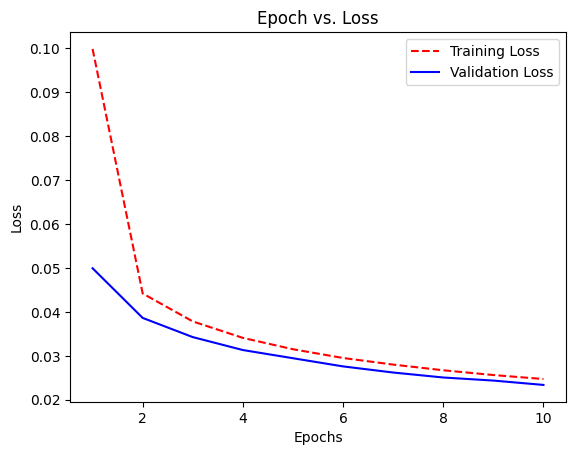

In [ ]:
val_loss = history_3.history['val_loss']
train_loss = history_3.history['loss']
epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, train_loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Epoch vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exercise 5 (CORE)

Visualise the prediction of some 3s from the test set. 

You may want to explore the effect of changing various hyperparameters at this point (e.g. filter numbers, pooling strategies...). Can you think of any modification to your architecture that would allow you to fix the embedding dimension and change the convolutional structure? 

1/1 [==============================] - 0s 25ms/step


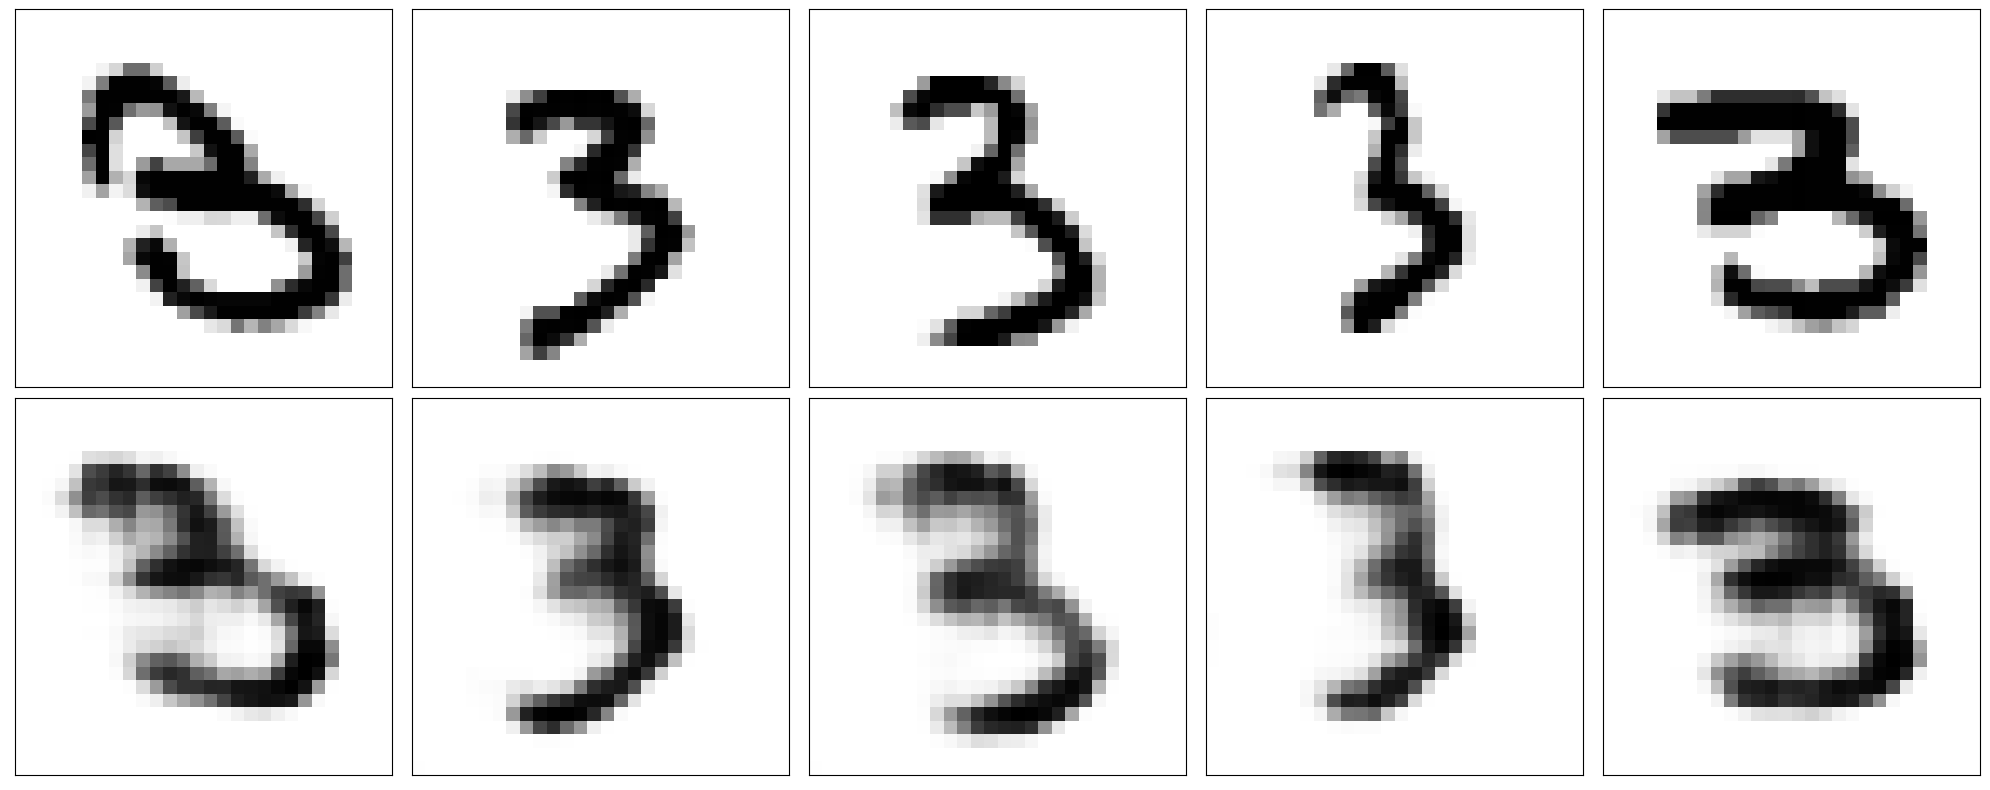

In [ ]:
# here I will visualise the first n_images from the test set of threes 
n_images = 5
label = 3

fig = plt.figure(figsize=(4*n_images, 4*2))
for j in range(n_images_per_label):
  ax_number = j + 1
  ax = fig.add_subplot(2, n_images, ax_number)
  ax.imshow(digits_dict_test[label][j], cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])

  ax_number = n_images + 1 + j
  predicted_image = autoencoder.predict(digits_dict_test[label][j].reshape((1,Nx,Ny,1)))

  ax = fig.add_subplot(2, n_images_per_label, ax_number)
  ax.imshow(predicted_image.reshape((Nx,Ny)), cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])

fig.tight_layout()

With a fixed set of convolutions, we could add fully connected layers in the centre of the network in an attempt to reduce the representation further. 

# Exercise 6 (CORE)

Visualise the output of the first set of convolutions, and then the second set for several different channels.

Are any of the features interpretable?

Some code below is included to help you get started. We create a new input layer, and extract the first layer from a trained model "autoencoder".  

In [ ]:
input_layer_vis = keras.layers.Input(shape=(Nx, Ny, 1))

first_conv = autoencoder.layers[1](input_layer_vis) 
first_conv_model = keras.models.Model(input_layer_vis, first_conv)
first_conv_model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 14ms/step


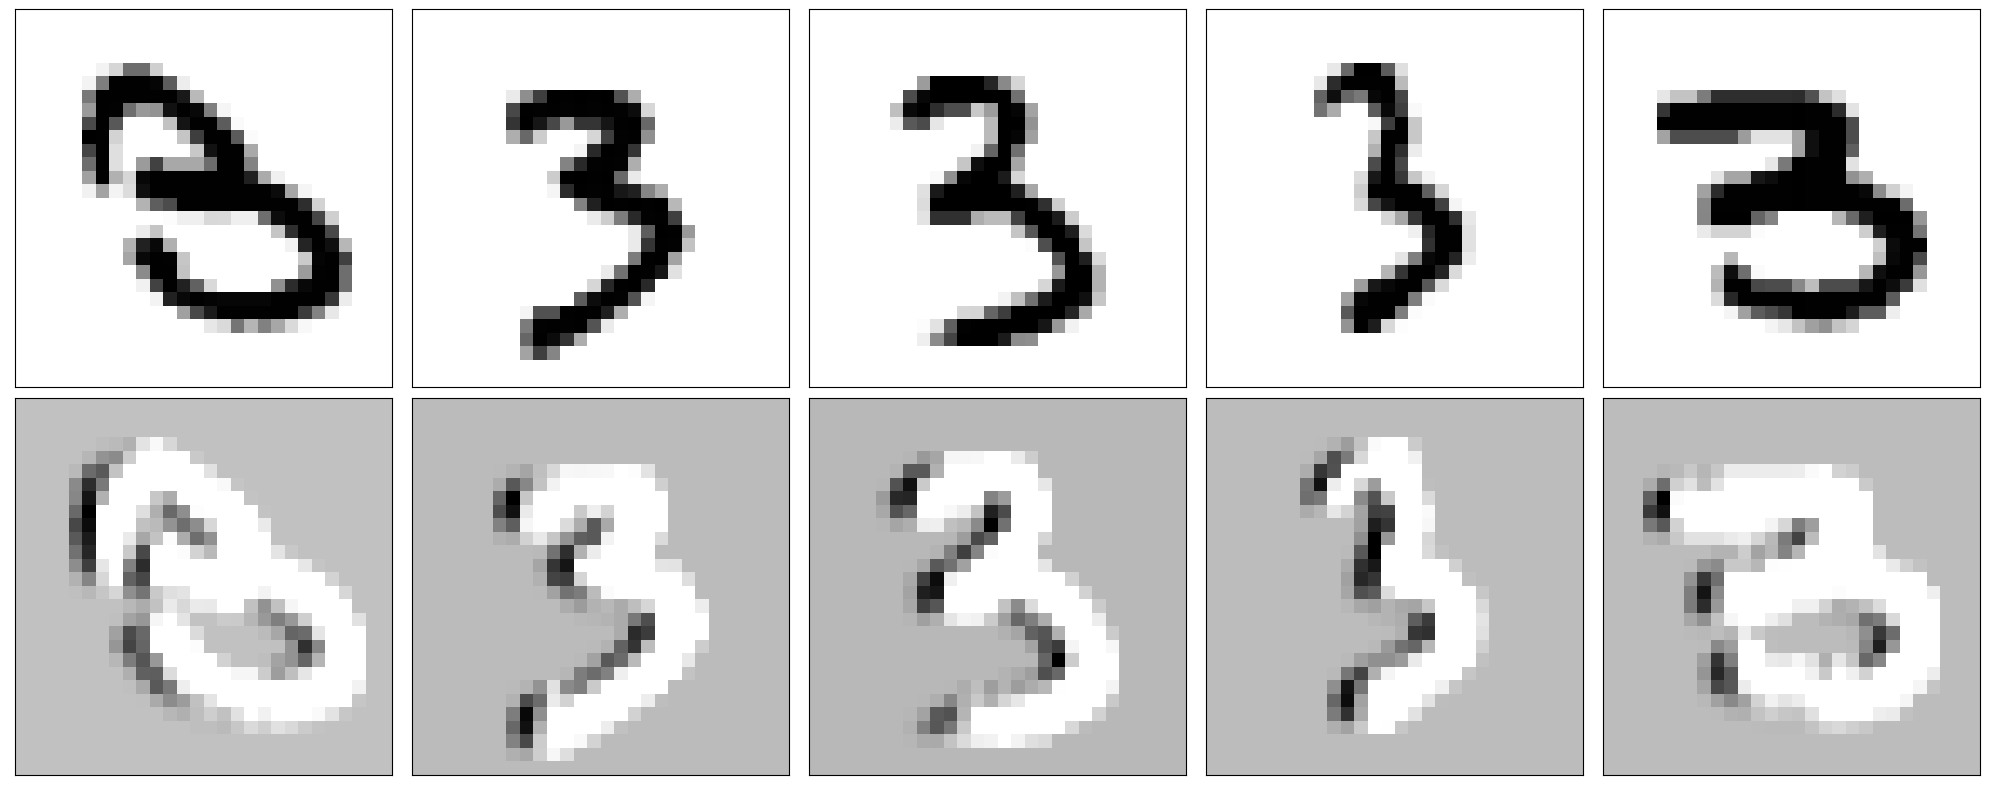

In [ ]:
# here I will visualise the first n_images from the test set of threes 
n_images = 5
label = 3
channel = 0

fig = plt.figure(figsize=(4*n_images, 4*2))
for j in range(n_images_per_label):
  ax_number = j + 1
  ax = fig.add_subplot(2, n_images, ax_number)
  ax.imshow(digits_dict_test[label][j], cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])

  ax_number = n_images + 1 + j
  predicted_images = first_conv_model.predict(digits_dict_test[label][j].reshape((1,Nx,Ny,1)))
  predicted_image = predicted_images[0,:,:, channel]

  ax = fig.add_subplot(2, n_images_per_label, ax_number)
  ax.imshow(predicted_image, cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])

fig.tight_layout()

Some channels are clearly edges. Others seem to just threshold pixel intensities. Some are harder to interpret. 

In [ ]:
# same again for second conv layer // note shape will now be max pooled
input_layer_vis = keras.layers.Input(shape=(Nx,Ny,1))
x = input_layer_vis
for j in range(1,4):
  x = autoencoder.layers[j](x) 
second_con_model = keras.models.Model(input_layer_vis, x)
second_con_model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 15ms/step


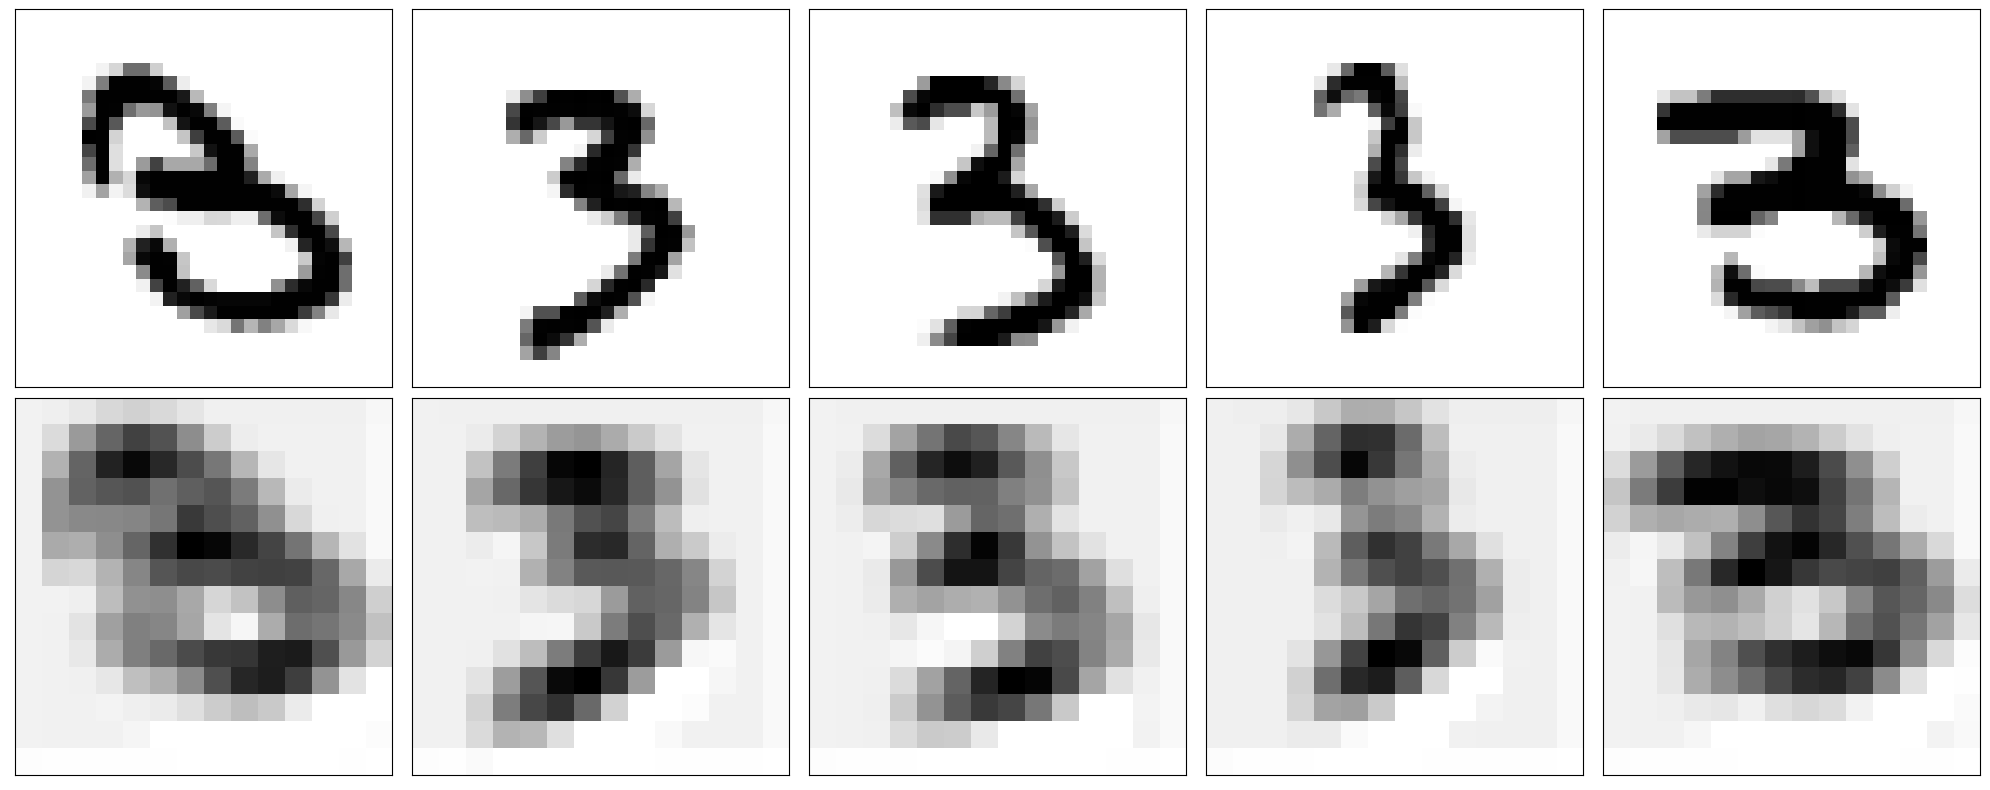

In [ ]:
n_images = 5
label = 3
channel = 5

fig = plt.figure(figsize=(4*n_images, 4*2))
for j in range(n_images_per_label):
  ax_number = j + 1
  ax = fig.add_subplot(2, n_images, ax_number)
  ax.imshow(digits_dict_test[label][j], cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])

  ax_number = n_images + 1 + j
  predicted_images = second_con_model.predict(digits_dict_test[label][j].reshape((1,Nx,Ny,1)))
  predicted_image = predicted_images[0,:,:, channel]

  ax = fig.add_subplot(2, n_images_per_label, ax_number)
  ax.imshow(predicted_image, cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])

fig.tight_layout()

Because of the down sampling these are somewhat harder to interpret. We can still see the signature of the original letter here though. 

# Exercise 7 (CORE)

Create two models from your trained autoencoder. One model should be the "encoder" module, which runs from the input to the layer where the output dimension is smallest. The second should be the "decoder", which convert the encoded representation back into an image of a 3. 

**Note:** Create a new input layer for each model, but make sure to extract the trained layers from your autoencoder. You might find it helpful to use layer.input_shape or layer.output_shape to extract tensor shapes rather than manually entering them, particularly when you attempt to construct the decoder. 

In [ ]:
# for arbitrary model, find indx of the "encoded" layer, assuming it has smallest output
smallest_dim = 100
for layer in autoencoder.layers[1:]: 
  out_dim = 1
  for j in layer.output_shape[1:]:
    out_dim *= j
    if out_dim < smallest_dim:
      smallest_dim = out_dim
      enc_indx = autoencoder.layers.index(layer)

In [ ]:
encoder_input = keras.layers.Input(shape=(Nx,Ny,1))
x = encoder_input
for j in range(1,enc_indx+1):
  x = autoencoder.layers[j](x)
encoder = keras.models.Model(encoder_input, x)
encoder.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 4)           292

In [ ]:
decoder_input = keras.layers.Input(shape=autoencoder.layers[enc_indx+1].input_shape[1:])
x = decoder_input
for j in range(enc_indx+1, len(autoencoder.layers)):
  x = autoencoder.layers[j](x)
decoder = keras.models.Model(decoder_input, x)
decoder.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 4, 4, 4)]         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 4)           148       
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 8, 8, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 8)           296       
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 16)        116

# Exercise 8 (EXTRA)
Compute the mean 3 from the test set. Then compute the embeddings of all the threes in test set, compute the mean *embedding* and then decode. 

- How do the results compare? 

- Can you offer an explanation for what you see?

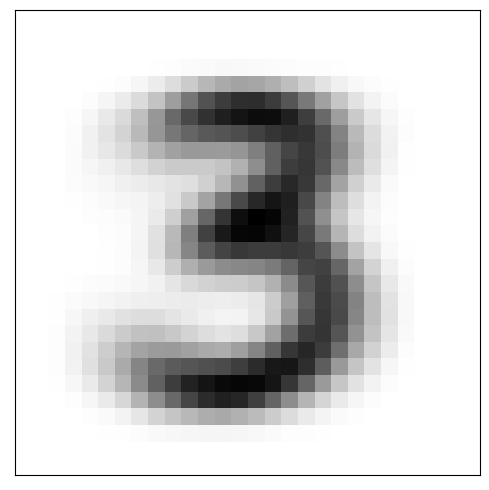

In [ ]:
three_mean_test = np.mean(digits_dict_test[3], axis=0, keepdims=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(three_mean_test.reshape(Nx, Ny), cmap='gray_r')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()

In [ ]:
embedded_threes = encoder.predict(np.asarray(digits_dict_test[3]).reshape((-1,Nx,Ny,1)))

32/32 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 55ms/step


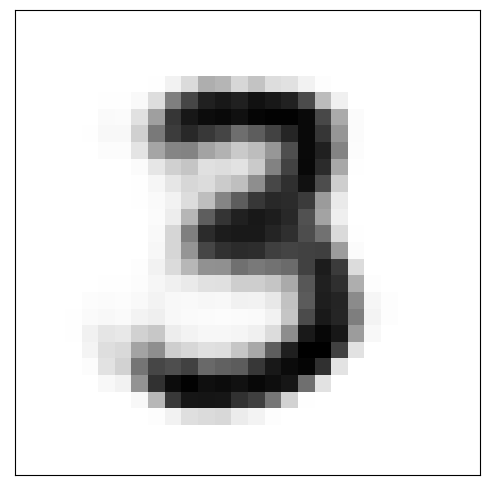

In [ ]:
mean_embedded_three = np.mean(embedded_threes, axis=0, keepdims=True)
decoded_mean_three = decoder.predict(mean_embedded_three)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(decoded_mean_three.reshape(Nx, Ny), cmap='gray_r')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()

The decode of the mean of the embeddings of threes looks much more like one of the original images than the mean image of a three. Very loosely, we can imagine the autoencoder has constructed a very efficient representation of the "three" manifold in image space, and averaging produces a point which is still on this manifold, while a straight average over images leads to blurring etc. 

# Exercise 9 (EXTRA)

Contaminate the images with (Gaussian) noise. Can you train a neural network to de-noise the images? Think carefully about what the objective function should be (what the "x" and "y" here)?  

In [ ]:
# partial code to get started 
noise_factor = 0.5

x_train_noisy = images_3 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images_3.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

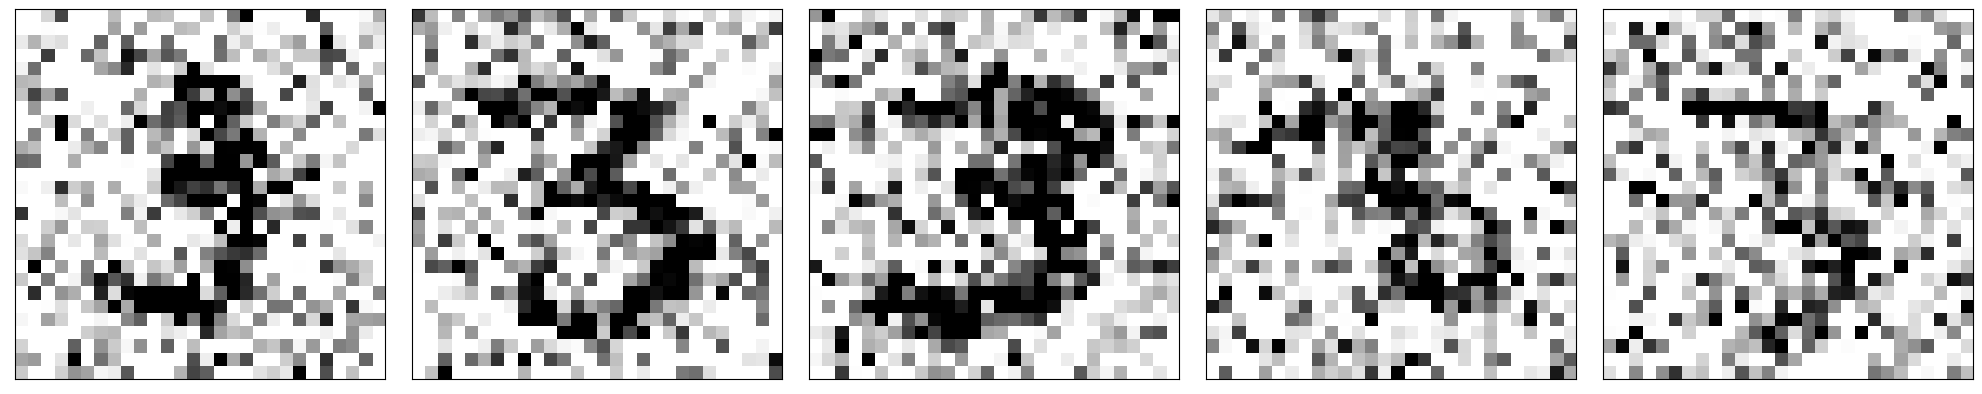

In [ ]:
n = 5
fig = plt.figure(figsize=(n * 4, 4))
for i in range(1, n + 1):
  ax = fig.add_subplot(1, n, i)
  ax.imshow(x_train_noisy[i].reshape(Nx, Ny), cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()

A natural choice of loss function would be the MSE again. Input X to the network are the noisy images now

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np

input_img = Input(shape=(Nx, Ny, 1))  # Adjust as per your image dimensions

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
# Consider adding more layers as needed

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
# Consider adding more layers as needed

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history_noisy = autoencoder.fit(x_train_noisy, images_3, epochs=10, batch_size=128, shuffle=True, validation_split=0.1)


Epoch 1/10
44/44 [==============================] - 4s 96ms/step - loss: 0.1387 - val_loss: 0.1152
Epoch 2/10
44/44 [==============================] - 4s 95ms/step - loss: 0.0699 - val_loss: 0.0323
Epoch 3/10
44/44 [==============================] - 4s 93ms/step - loss: 0.0270 - val_loss: 0.0237
Epoch 4/10
44/44 [==============================] - 4s 93ms/step - loss: 0.0222 - val_loss: 0.0214
Epoch 5/10
44/44 [==============================] - 4s 95ms/step - loss: 0.0206 - val_loss: 0.0201
Epoch 6/10
44/44 [==============================] - 4s 93ms/step - loss: 0.0195 - val_loss: 0.0193
Epoch 7/10
44/44 [==============================] - 4s 95ms/step - loss: 0.0188 - val_loss: 0.0187
Epoch 8/10
44/44 [==============================] - 4s 95ms/step - loss: 0.0183 - val_loss: 0.0182
Epoch 9/10
44/44 [==============================] - 4s 93ms/step - loss: 0.0178 - val_loss: 0.0178
Epoch 10/10
44/44 [==============================] - 4s 93ms/step - loss: 0.0175 - val_loss: 0.0176


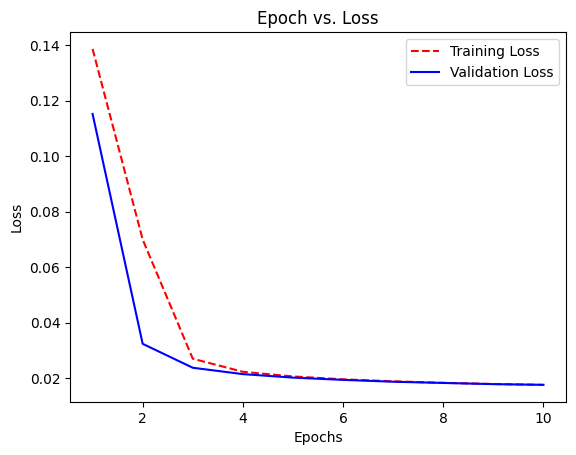

In [ ]:
val_loss = history_noisy.history['val_loss']
train_loss = history_noisy.history['loss']
epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, train_loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Epoch vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Exercise 10 (EXTRA)

Consider the similar CNN structure for another digit that we have as a subset, such as 5 or 8. 

Follow the similar model architecture and look at your validation loss to compare the general performance with the results of digit 3 case. 

In [ ]:
array_5 = np.asarray(digits_dict_train[5])
images_5 = array_5.reshape(array_5.shape + (1,))

input_layer_5 = keras.layers.Input(shape=images_5.shape[1:])
print(input_layer_5)

history_5 = autoencoder.fit(x=images_5, y=images_5, epochs=10, shuffle=True, validation_split=0.1)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_26'), name='input_26', description="created by layer 'input_26'")
Epoch 1/10
153/153 [==============================] - 5s 30ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 2/10
153/153 [==============================] - 4s 29ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 3/10
153/153 [==============================] - 5s 30ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/10
153/153 [==============================] - 5s 30ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 5/10
153/153 [==============================] - 5s 30ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/10
153/153 [==============================] - 5s 30ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/10
153/153 [==============================] - 5s 30ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/10
153/153 [==============================] - 5s 30ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/10
153/153 [==================

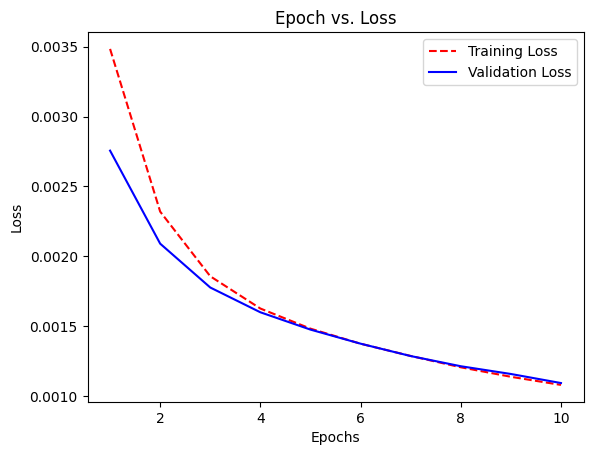

In [ ]:
val_loss = history_5.history['val_loss']
train_loss = history_5.history['loss']
epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, train_loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Epoch vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2a9ec8d-a343-4210-b36b-f9db26268fc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>